This notebook file is used data cleaning, preprocessing, and create shape file.  
All data is from [Redistricting Data Hub](https://redistrictingdatahub.org/state/arizona/)

In [1]:
# import necessary library
import geopandas as gpd
import maup
from maup import smart_repair

maup.progress.enabled = True
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the files
population_df = gpd.read_file("../data/arizona/az_pl2020_b/az_pl2020_p2_b.shp")
vap_df = gpd.read_file("../data/arizona/az_pl2020_b/az_pl2020_p4_b.shp")
vest20_df = gpd.read_file("../data/arizona/az_vest_20/az_vest_20.shp")
county_df = gpd.read_file("../data/arizona/az_pl2020_cnty/az_pl2020_cnty.shp")
sen_df = gpd.read_file("../data/arizona/az_pl2020_sldu/az_pl2020_sldu.shp")

In [5]:
sen_df['SLDUST20'] = sen_df['SLDUST20'].astype(str).str.lstrip('0').astype(int)
district_col_name = "SLDUST20"
population_df = population_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(vap_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
sen_df = sen_df.to_crs(sen_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())

# Data inspection and cleaning with MAUP

In [6]:
maup.doctor(population_df)

100%|████████████████████████████████████████████████████████████████████| 155444/155444 [00:47<00:00, 3290.11it/s]


True

In [7]:
maup.doctor(vap_df)

100%|████████████████████████████████████████████████████████████████████| 155444/155444 [00:47<00:00, 3298.36it/s]


True

In [8]:
maup.doctor(county_df)

100%|█████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 145.76it/s]


True

In [9]:
maup.doctor(sen_df)

100%|█████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 150.56it/s]


True

In [10]:
maup.doctor(vest20_df)

100%|████████████████████████████████████████████████████████████████████████| 1489/1489 [00:01<00:00, 1382.05it/s]


There are 426 overlaps.
There are 5023 holes.


False

In [11]:
final_df = smart_repair(vest20_df, nest_within_regions=county_df)

100%|█████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 154.65it/s]


Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


100%|██████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 42.53it/s]


Identifying overlaps...


100%|███████████████████████████████████████████████████████████████████████| 39294/39294 [00:55<00:00, 708.91it/s]


Resolving overlaps and filling gaps...


Gaps to fill in region 5: 100%|██████████████████████████████████████████████████████| 4/4 [00:00<00:00, 26.38it/s]
Gaps to simplify in region 6: 478it [00:09, 49.23it/s]                                                             
Gaps to simplify in region 10: 100%|█████████████████████████████████████████████| 501/501 [00:21<00:00, 23.05it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to fill in region 14: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 16.01it/s]


In [12]:
final_df = smart_repair(final_df, min_rook_length=30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|████████████████████████████████████████████████████████████████████████| 1489/1489 [00:00<00:00, 5032.04it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


Converting small rook adjacencies to queen...


100%|██████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3583.34it/s]


In [13]:
maup.doctor(final_df)

100%|████████████████████████████████████████████████████████████████████████| 1489/1489 [00:01<00:00, 1322.54it/s]


True

## Put data in the same geometry unit

In [14]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, final_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, final_df.geometry)

100%|█████████████████████████████████████████████████████████████████████████| 1489/1489 [00:06<00:00, 226.92it/s]


In [15]:
population_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

### Naming reference
#### Total population
Total: P0020001  
Hispanic or Latino: P0020002  
Not Hispanic or Latino: P0020003  
Population of one race: P0020004  
White alone: P0020005  
Black or African American alone: P0020006  
American Indian and Alaska Native alone: P0020007  
Asian alone: P0020008  
Native Hawaiian and Other Pacific Islander alone: P0020009  
Some Other Race alone: P0020010  
#### voting age population
Total: P0040001  
Hispanic or Latino: P0040002  
Not Hispanic or Latino: P0040003  
Population of one race: P0040004  
White alone: P0040005  
Black or African American alone: P0040006  
American Indian and Alaska Native alone: P0040007  
Asian alone: P0040008  
Native Hawaiian and Other Pacific Islander alone: P0040009  
Some Other Race alone: P0040010  

In [16]:
# The columns we are interested in
pop_column_names = ['P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010']

In [17]:
vap_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0040001',
       'P0040002', 'P0040003', 'P0040004', 'P0040005', 'P0040006', 'P0040007',
       'P0040008', 'P0040009', 'P0040010', 'P0040011', 'P0040012', 'P0040013',
       'P0040014', 'P0040015', 'P0040016', 'P0040017', 'P0040018', 'P0040019',
       'P0040020', 'P0040021', 'P0040022', 'P0040023', 'P0040024', 'P0040025',
       'P0040026', 'P0040027', 'P0040028', 'P0040029', 'P0040030', 'P0040031',
       'P0040032', 'P0040033', 'P0040034', 'P0040035', 'P0040036', 'P0040037',
       'P0040038', 'P0040039', 'P0040040', 'P0040041', 'P0040042', 'P0040043',
       'P0040044', 'P0040045', 'P0040046', 'P0040047', 'P0040048', 'P0040049',
       'P0040050', 'P0040051', 'P0040052', 'P0040053', 'P0040054', 'P0040055',
       'P0040056', 'P0040057', 'P0040058', 'P0040059', 'P0040060', 'P0040061',
       'P0040062', 'P0040063', 'P0040064', 'P0040065', 'P0040066', 'P0040067',
       'P0040068', 'P0040069', 'P0040070', 'P0040071', 'P004

In [18]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010']

In [19]:
for name in pop_column_names:
    final_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    final_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [20]:
# Check if the data matches
print(population_df['P0020001'].sum())
print(final_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(final_df['P0040001'].sum())

7151502
7151502
5541976
5541976


In [21]:
final_df.columns

Index(['CDE_COUNTY', 'PCTNUM', 'PRECINCTNA', 'G20PREDBID', 'G20PRERTRU',
       'G20PRELJOR', 'G20USSDKEL', 'G20USSRMCS', 'geometry', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0040001', 'P0040002', 'P0040005',
       'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010'],
      dtype='object')

The new column names below follow the conventions used [at MGGG-states](https://github.com/mggg-states) and [eveomett-states](https://github.com/eveomett-states).  Some of these columns are in the election dataframe, some in the population and vap dataframes.

We'll drop the columns that we're not interested in (including non-Democratic and non-Republican votes).

In [34]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE',
               'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN', 'P0020008': 'NH_ASIAN', 
               'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0040001': 'VAP', 'P0040002': 'HVAP', 
               'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP', 'P0040008': 'ASIANVAP', 
               'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'G20PREDBID': 'G20PRED', 
               'G20PRERTRU': 'G20PRER', 'G20USSDKEL': 'G20USSD', 'G20USSRMCS': 'G20USSR'}

In [35]:
final_df.rename(columns=rename_dict, inplace = True)

In [36]:
final_df.columns

Index(['CDE_COUNTY', 'PCTNUM', 'PRECINCTNA', 'G20PRED', 'G20PRER', 'G20USSD',
       'G20USSR', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK',
       'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'VAP', 'HVAP', 'WVAP',
       'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP'],
      dtype='object')

In [38]:
# Drop the columns we don't need
final_df.drop(columns=[ 'G20PRELJOR', 'P0020003', 'P0020004'], inplace=True)
final_df.columns

Index(['CDE_COUNTY', 'PCTNUM', 'PRECINCTNA', 'G20PRED', 'G20PRER', 'G20USSD',
       'G20USSR', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK',
       'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'VAP', 'HVAP', 'WVAP',
       'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP'],
      dtype='object')

In [27]:
vap_df.rename(columns=rename_dict, inplace = True)
vap_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'VAP', 'HVAP',
       'P0040003', 'P0040004', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', 'P0040011', 'P0040012', 'P0040013', 'P0040014',
       'P0040015', 'P0040016', 'P0040017', 'P0040018', 'P0040019', 'P0040020',
       'P0040021', 'P0040022', 'P0040023', 'P0040024', 'P0040025', 'P0040026',
       'P0040027', 'P0040028', 'P0040029', 'P0040030', 'P0040031', 'P0040032',
       'P0040033', 'P0040034', 'P0040035', 'P0040036', 'P0040037', 'P0040038',
       'P0040039', 'P0040040', 'P0040041', 'P0040042', 'P0040043', 'P0040044',
       'P0040045', 'P0040046', 'P0040047', 'P0040048', 'P0040049', 'P0040050',
       'P0040051', 'P0040052', 'P0040053', 'P0040054', 'P0040055', 'P0040056',
       'P0040057', 'P0040058', 'P0040059', 'P0040060', 'P0040061', 'P0040062',
       'P0040063', 'P0040064', 'P0040065', 'P0040066', 'P0040067', 'P0040068',
       'P0040069', 'P0040070', 'P0040071', 'P0040072', 'P0040073', 

# Add 2018 election data

In [29]:
vest18_df = gpd.read_file("../data/arizona/az_vest_18/az_vest_18.shp")

In [30]:
vest18_df.columns

Index(['CDE_COUNTY', 'PCTNUM', 'PRECINCTNA', 'G18USSRMCS', 'G18USSDSIN',
       'G18USSGGRE', 'G18USSOWRI', 'G18GOVRDUC', 'G18GOVDGAR', 'G18GOVGTOR',
       'G18GOVOWRI', 'G18SOSRGAY', 'G18SOSDHOB', 'G18SOSOWRI', 'G18ATGRBRN',
       'G18ATGDCON', 'G18ATGOWRI', 'G18TRERYEE', 'G18TREDMAN', 'G18TREOWRI',
       'G18SPIRRIG', 'G18SPIDHOF', 'G18SPIOWRI', 'G18MNIRHAR', 'G18MNIDPIE',
       'G18MNIOWRI', 'geometry'],
      dtype='object')

In [39]:
rename_18_dict = {'G18USSRMCS': 'G18USSR', 'G18USSDSIN': 'G18USSD', 'G18GOVRDUC': 'G18GOVR', 
                  'G18GOVDGAR': 'G18GOVD', 'G18SOSRGAY': 'G18SOSR', 'G18SOSDHOB': 'G18SOSD', 
                  'G18ATGRBRN': 'G18ATGR', 'G18ATGDCON': 'G18ATGD', 'G18TRERYEE': 'G18TRER', 
                  'G18TREDMAN': 'G18TRED', 'G18SPIRRIG': 'G18SPIR', 'G18SPIDHOF': 'G18SPID', 
                  'G18MNIRHAR': 'G18MNIR', 'G18MNIDPIE': 'G18MNID'}

In [40]:
vest18_df.rename(columns=rename_18_dict, inplace = True)
vest18_df.columns

Index(['CDE_COUNTY', 'PCTNUM', 'PRECINCTNA', 'G18USSR', 'G18USSD',
       'G18USSGGRE', 'G18USSOWRI', 'G18GOVR', 'G18GOVD', 'G18GOVGTOR',
       'G18GOVOWRI', 'G18SOSR', 'G18SOSD', 'G18SOSOWRI', 'G18ATGR', 'G18ATGD',
       'G18ATGOWRI', 'G18TRER', 'G18TRED', 'G18TREOWRI', 'G18SPIR', 'G18SPID',
       'G18SPIOWRI', 'G18MNIR', 'G18MNID', 'G18MNIOWRI', 'geometry'],
      dtype='object')

In [41]:
vest18_df.drop(columns=['G18USSGGRE', 'G18USSOWRI', 'G18GOVGTOR', 'G18GOVOWRI', 'G18SOSOWRI', 
                       'G18ATGOWRI', 'G18TREOWRI', 'G18SPIOWRI', 'G18MNIOWRI'], inplace=True)
vest18_df.columns

Index(['CDE_COUNTY', 'PCTNUM', 'PRECINCTNA', 'G18USSR', 'G18USSD', 'G18GOVR',
       'G18GOVD', 'G18SOSR', 'G18SOSD', 'G18ATGR', 'G18ATGD', 'G18TRER',
       'G18TRED', 'G18SPIR', 'G18SPID', 'G18MNIR', 'G18MNID', 'geometry'],
      dtype='object')

In [42]:
elec2018_cols = ['G18USSR', 'G18USSD', 'G18GOVR', 'G18GOVD', 'G18SOSR', 'G18SOSD', 
                 'G18ATGR', 'G18ATGD', 'G18TRER', 'G18TRED', 'G18SPIR', 'G18SPID', 
                 'G18MNIR', 'G18MNID']

#### Check if the data is clean

In [43]:
vest18_df = vest18_df.to_crs(vest18_df.estimate_utm_crs())

In [44]:
maup.doctor(vest18_df)

100%|████████████████████████████████████████████████████████████████████████| 1489/1489 [00:01<00:00, 1449.19it/s]


There are 426 overlaps.
There are 5023 holes.


False

In [45]:
vest18_df = smart_repair(vest18_df)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|██████████████████████████████████████████████████████████████████████| 11803/11803 [00:04<00:00, 2640.57it/s]


Resolving overlaps...
Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to fill: 100%|██████████████████████████████████████████████████████████████| 145/145 [00:15<00:00,  9.13it/s]


In [46]:
maup.doctor(vest18_df)

100%|████████████████████████████████████████████████████████████████████████| 1489/1489 [00:01<00:00, 1380.27it/s]


True

In [47]:
blocks_to_2018precincts_assignment = maup.assign(population_df.geometry, vest18_df.geometry)

100%|█████████████████████████████████████████████████████████████████████████| 1489/1489 [00:06<00:00, 247.54it/s]


In [48]:
weights2018 = vap_df["VAP"]/blocks_to_2018precincts_assignment.map(vap_df["VAP"].groupby(blocks_to_2018precincts_assignment).sum())
weights2018 = weights2018.fillna(0)

In [49]:
prorated2018 = maup.prorate(blocks_to_2018precincts_assignment, vest18_df[elec2018_cols], weights2018)
final_df[elec2018_cols] = prorated2018
final_df.head()

,CDE_COUNTY,PCTNUM,PRECINCTNA,G20PRED,G20PRER,G20USSD,G20USSR,geometry,TOTPOP,HISP,...,G18SOSR,G18SOSD,G18ATGR,G18ATGD,G18TRER,G18TRED,G18SPIR,G18SPID,G18MNIR,G18MNID
0,AP,AP0002,ALPINE,94,283,98,284,"POLYGON ((639562.612 3724697.476, 639542.675 3...",664,77,...,23.776309,17.380783,24.340620,16.440264,25.055414,15.386884,23.211998,16.929334,23.550585,15.537367
1,AP,AP0003,CANYON DE CHELLY,1982,273,1995,290,"POLYGON ((615284.521 4013717.601, 615291.241 4...",4666,40,...,7.781710,2.757323,7.887881,2.557472,8.034647,2.348253,7.544387,2.832268,7.694275,2.466914
2,AP,AP0005,CHINLE,989,148,994,157,"POLYGON ((630269.897 3994902.053, 630183.481 3...",2949,62,...,7.609556,2.895642,7.871251,2.647541,7.993603,2.423231,7.419232,2.902439,7.585766,2.559176
3,AP,AP0009,CONCHO,333,1486,381,1422,"POLYGON ((633859.681 3816946.040, 633860.598 3...",2945,279,...,37.796742,23.436773,38.657874,22.389449,40.077580,20.248254,36.167572,23.739333,37.145074,21.295578
4,AP,AP0011,COTTONWOOD,748,87,763,85,"POLYGON ((622628.308 3987911.500, 622654.410 3...",1529,15,...,10.705221,4.138153,11.042570,3.778313,11.087550,3.575904,10.030522,4.363052,10.435341,3.958233


# Add senate district data

In [50]:
precincts_to_districts_assignment = maup.assign(final_df.geometry, sen_df.geometry)
final_df["SEND"] = precincts_to_districts_assignment

100%|██████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.10it/s]


In [51]:
precincts_to_districts_assignment

0        7
1        7
2        7
3        7
4        7
        ..
1484     5
1485     5
1486     2
1487    14
1488    14
Length: 1489, dtype: int64

In [52]:
print(set(final_df["SEND"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


In [53]:
sen_df.head()

,STATEFP20,SLDUST20,GEOID20,NAMELSAD20,LSAD20,LSY20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,...,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,geometry
0,04,27,04027,State Senate District 27,LU,2018,G5210,N,655807196,1101389,...,7418,6859,31,296,232,2049,0,0,2049,"POLYGON ((378273.188 3694294.212, 378353.904 3..."
1,04,17,04017,State Senate District 17,LU,2018,G5210,N,173576990,602393,...,412,0,39,348,25,917,48,0,869,"POLYGON ((416797.879 3683920.544, 416888.862 3..."
2,04,6,04006,State Senate District 6,LU,2018,G5210,N,26356707935,116179805,...,1614,1109,23,476,6,11997,9829,0,2168,"POLYGON ((340621.665 3913569.014, 340632.119 3..."
3,04,20,04020,State Senate District 20,LU,2018,G5210,N,112450839,259281,...,900,0,76,824,0,2142,1196,0,946,"POLYGON ((386980.334 3721918.007, 387001.687 3..."
4,04,26,04026,State Senate District 26,LU,2018,G5210,N,312451066,7784490,...,435,130,110,151,44,9138,7624,0,1514,"POLYGON ((407401.640 3694192.009, 407402.139 3..."


In [54]:
for precinct_index in range(len(final_df)):
    final_df.at[precinct_index, "SEND"] = sen_df.at[int(final_df.at[precinct_index, "SEND"]), district_col_name]
print(set(sen_df[district_col_name]))
print(set(final_df["SEND"]))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}


In [55]:
final_df.columns

Index(['CDE_COUNTY', 'PCTNUM', 'PRECINCTNA', 'G20PRED', 'G20PRER', 'G20USSD',
       'G20USSR', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK',
       'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'VAP', 'HVAP', 'WVAP',
       'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', 'G18USSR',
       'G18USSD', 'G18GOVR', 'G18GOVD', 'G18SOSR', 'G18SOSD', 'G18ATGR',
       'G18ATGD', 'G18TRER', 'G18TRED', 'G18SPIR', 'G18SPID', 'G18MNIR',
       'G18MNID', 'SEND'],
      dtype='object')

<Axes: >

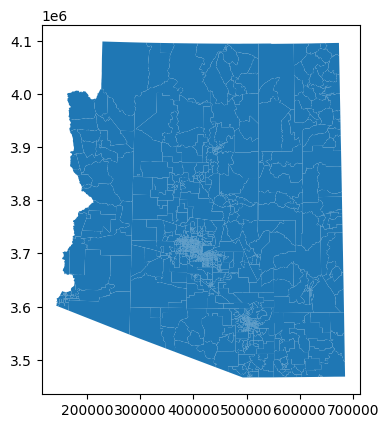

In [56]:
final_df.plot()

In [59]:
pop_vals = [final_df.loc[final_df["SEND"] == n, "TOTPOP"].sum() for n in range(1, 31)]
print(pop_vals)

[246622, 217814, 207554, 222588, 228298, 232186, 194148, 229764, 220117, 220240, 250664, 305494, 281046, 224563, 244036, 268268, 259194, 232183, 242889, 238843, 238402, 273300, 236376, 225034, 241534, 237003, 236787, 231260, 233933, 231362]


In [62]:
import os
directory = "../data"
folder = "../data/AZ"
if not os.path.exists(directory):
    os.makedirs(directory)
if not os.path.exists(folder):
    os.makedirs(folder)
final_df.to_file("../data/AZ/AZ.shp")